In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs

In [2]:
all_years_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/all_years_combined_CCPF/all_years_CCPF_cpm_hindcast.hdf', 'table')
all_years_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/all_years_combined_CCPF/all_years_CCPF_obs.hdf', 'table')

In [4]:
all_years_cpm = all_years_cpm[all_years_cpm.datetime.dt.year > 2000]

In [5]:
dataframes = [all_years_cpm, all_years_obs]

for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0]) 
    set(df['datetime'])

In [7]:
## stats for pre and post filtering ##
# ---------------------------------------
print('Stats for all years combined:')
print(' ')

print(np.unique(all_years_obs.cell.values).shape[0], "cells in the observed original non-filtered dataset")

print(np.unique(all_years_cpm.cell.values).shape[0], "cells in the CPM original non-filtered dataset")

print("Difference of {} cells".format((np.unique(all_years_cpm.cell.values).shape[0] - np.unique(all_years_obs.cell.values).shape[0])))

# print("Total of", (np.unique(all_years_obs.cell.values).shape[0])-(np.unique(all_years_cpm.cell.values).shape[0]), "cells removed post-filtering")

# print(((((np.unique(all_years_obs.cell.values).shape[0])-(np.unique(all_years_cpm.cell.values).shape[0]))/(np.unique(all_years_obs.cell.values).shape[0]))*100), "% decrease")

Stats for all years combined:
 
16521 cells in the observed original non-filtered dataset
21060 cells in the CPM original non-filtered dataset
Difference of 4539 cells


**Loading in each year individually**

In [2]:
## CPM-Hindcast tracks ##

yr_1998_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/1998/CCPF_1998.hdf', 'table')
yr_1999_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/1999/CCPF_1999.hdf', 'table')
yr_2000_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2000/CCPF_2000.hdf', 'table')
yr_2001_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2001/CCPF_2001.hdf', 'table')
yr_2002_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/2007/CCPF_2007.hdf', 'table')

In [3]:
## Satellite Obs tracks ##

yr_2001_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2001/CCPF_2001.hdf', 'table')
yr_2002_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2007/CCPF_2007.hdf', 'table')

In [4]:
## CPM-PD tracks ##

yr_1998_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/1998/CCPF_1998.hdf', 'table')
yr_1999_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/1999/CCPF_1999.hdf', 'table')
yr_2000_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2000/CCPF_2000.hdf', 'table')
yr_2001_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2001/CCPF_2001.hdf', 'table')
yr_2002_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2007/CCPF_2007.hdf', 'table')

In [43]:
## Finding the number of MCSs in each year in CPM and obs


dataframes = [yr_1998_cpm, yr_1999_cpm, yr_2000_cpm, yr_2001_cpm, yr_2002_cpm, yr_2003_cpm, yr_2004_cpm, yr_2005_cpm, yr_2006_cpm, yr_2007_cpm, yr_1998_pd, yr_1999_pd, yr_2000_pd, yr_2001_pd, yr_2002_pd, yr_2003_pd, yr_2004_pd, yr_2005_pd, yr_2006_pd, yr_2007_pd, yr_2001_obs, yr_2002_obs, yr_2003_obs, yr_2004_obs, yr_2005_obs, yr_2006_obs, yr_2007_obs]

unique_cells = []

for dataframe in dataframes:
    number = np.unique(dataframe.cell.values).shape[0]
    unique_cells.append(number) # Saving these values to a list


In [44]:
## First 7 values in the list are from the CPM and last 7 are from the obs

unique_cells_cpm = unique_cells[:10]
unique_cells_pd = unique_cells[10:20]
unique_cells_obs = unique_cells[20:]


In [45]:
unique_cells_cpm

[2906, 3224, 3078, 2999, 2955, 3059, 3070, 2886, 3022, 3070]

In [46]:
unique_cells_pd

[2401, 3109, 3116, 3025, 2919, 2892, 3091, 2894, 3038, 2962]

In [47]:
unique_cells_obs

[2321, 2216, 2356, 2212, 2350, 2642, 2425]

In [48]:
unique_cells_obs.insert(0, 0) ## inserting zeros to the list for years 1998, 1999 and 2000 as there's no satellite data
unique_cells_obs.insert(0, 0)
unique_cells_obs.insert(0, 0)
unique_cells_obs

[0, 0, 0, 2321, 2216, 2356, 2212, 2350, 2642, 2425]

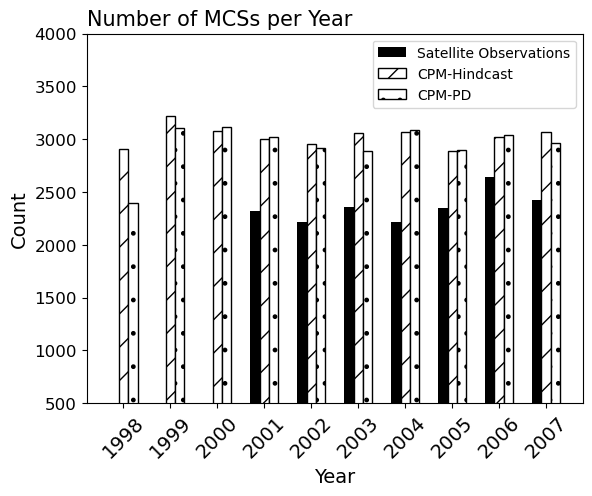

In [55]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
#plt.figure(figsize=(16,10))

N = 10
ind = np.arange(N) 
width = 0.2

# Choose the height of the bars
obs_height = unique_cells_obs
cpm_height = unique_cells_cpm
pd_height = unique_cells_pd


# Choose the names of the bars
bars = ('1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007')
x_pos = np.arange(len(bars))

# c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

obs = obs_height
bar1 = plt.bar(bars, obs, width, color = 'k',label='Satellite Observations')
  
cpm = cpm_height
bar2 = plt.bar(ind+width, cpm, width, color= 'white', edgecolor='k',hatch='/',label='CPM-Hindcast')

pd = pd_height
bar3 = plt.bar(ind+width*2, pd, width, color= 'white', edgecolor='k',hatch='.',label='CPM-PD')




# Create bars
# plt.bar(bars, obs_height, color=c, width=0.6)
# plt.bar(bars, cpm_height, color='white', edgecolor=c, hatch='/', width=0.6)
plt.xticks(ind+width*1, fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylim(500, 4000)
plt.title('Number of MCSs per Year',fontsize=15,loc='left')
plt.legend(loc='best')

In [33]:
pd.set_option("display.max_columns", 50)

In [57]:
yr_2001_pd.sort_values(by='timestr', ascending=True)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,...,w_5_down,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_w_down_lat,max_w_down_lon,colocated_pixels
2,0,14,382.866690,832.352042,14849,240,3,2001-01-01 00:30:00,2001-01-01 00:30:00,-24.533948,...,0.0,-26.25,-49.950001,-26.15,-50.049999,-26.25,-49.950001,-25.65,-52.450001,133
8,0,222,1079.204595,1324.245315,4523,240,9,2001-01-01 00:30:00,2001-01-01 00:30:00,3.667737,...,NaN,0,0,0,0,0,0,0,0,0
15,1,189,1093.378318,1324.285908,4028,240,16,2001-01-01 01:30:00,2001-01-01 01:30:00,4.241770,...,NaN,4.85,-32.450001,4.75,-32.349998,0,0,0,0,17
10,1,20,385.337890,827.547704,14788,240,11,2001-01-01 01:30:00,2001-01-01 01:30:00,-24.433867,...,NaN,-23.35,-50.75,-26.15,-50.049999,0,0,0,0,94
16,2,10,388.135097,822.044174,14078,240,17,2001-01-01 02:30:00,2001-01-01 02:30:00,-24.320578,...,NaN,-23.25,-50.75,-25.15,-53.349998,0,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103869,8636,318,897.258540,425.848631,9166,240,103870,2001-12-30 20:30:00,2001-12-30 20:30:00,-3.701081,...,NaN,-4.65,-66.75,-4.75,-67.050003,0,0,0,0,270
103890,8637,411,1174.337540,1259.160532,17121,240,103891,2001-12-30 21:30:00,2001-12-30 21:30:00,7.520621,...,0.0,7.05,-34.25,7.05,-34.25,5.45,-37.549999,7.25,-34.849998,55
103886,8637,292,903.665921,433.395823,10239,240,103887,2001-12-30 21:30:00,2001-12-30 21:30:00,-3.441581,...,NaN,0,0,0,0,0,0,0,0,0
103907,8638,311,1178.188323,1265.279755,16560,240,103908,2001-12-30 22:30:00,2001-12-30 22:30:00,7.676576,...,NaN,7.15,-34.849998,6.85,-34.150002,0,0,0,0,70
